In [11]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [12]:
df = pd.read_csv('dataset.csv')
print(list(df.columns))
cols_to_drop = ['id','Title', 'Author','Pagecount','Autherkeywords','AuthorsID','Volume','Issue','Pagestart','Pageend','Indexkeywords','Source', 'ENTRYTYPE', 'doi', 'url','Affiliations', 'Authors_affiliations', 'Address', 'Publisher', 'Language', 'AbbreviatedSource','Publication_Stage', 'Access_Type', 'EID',]
new_df = df.drop(cols_to_drop, axis=1)

emb_dummies = pd.get_dummies(new_df['Document_Type'], drop_first=True, prefix='Document_Type')
new_df = pd.concat([new_df, emb_dummies], axis=1)
new_df.drop('Document_Type', axis=1, inplace=True)

year_dummies = pd.get_dummies(new_df['Year'], drop_first=True, prefix='Year')
new_df = pd.concat([new_df, year_dummies], axis=1)
new_df.drop('Year', axis=1, inplace=True)

new_df = new_df.fillna(0)
print(list(new_df.columns))

['id', 'primary', 'Title', 'Autherkeywords', 'Indexkeywords', 'Author', 'AuthorsID', 'Volume', 'Issue', 'Year', 'Pagestart', 'Pageend', 'Pagecount', 'Source', 'ENTRYTYPE', 'doi', 'url', 'citation_count', 'Affiliations', 'Authors_affiliations', 'Address', 'Publisher', 'Language', 'AbbreviatedSource', 'Document_Type', 'Publication_Stage', 'Access_Type', 'EID', 'ABSTRACT_VIEWS', 'ALL_BLOG_COUNT', 'CITED_BY_COUNT', 'DOWNLOAD_COUNT', 'EXPORTS_SAVES', 'FACEBOOK_COUNT', 'FULL_TEXT_VIEWS', 'LINK_CLICK_COUNT', 'LINK_OUTS', 'READER_COUNT', 'REFERENCE_COUNT', 'TWEET_COUNT', 'capture', 'citation', 'mention', 'socialMedia', 'usage']
['primary', 'citation_count', 'ABSTRACT_VIEWS', 'ALL_BLOG_COUNT', 'CITED_BY_COUNT', 'DOWNLOAD_COUNT', 'EXPORTS_SAVES', 'FACEBOOK_COUNT', 'FULL_TEXT_VIEWS', 'LINK_CLICK_COUNT', 'LINK_OUTS', 'READER_COUNT', 'REFERENCE_COUNT', 'TWEET_COUNT', 'capture', 'citation', 'mention', 'socialMedia', 'usage', 'Document_Type_Book Chapter', 'Document_Type_Conference Paper', 'Document_T

In [13]:
X = new_df.drop(['primary'], axis=1)
Y = new_df['primary']

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split( X,Y,test_size=0.3,random_state=0)

In [15]:
x_train.shape,x_test.shape

((52, 33), (23, 33))

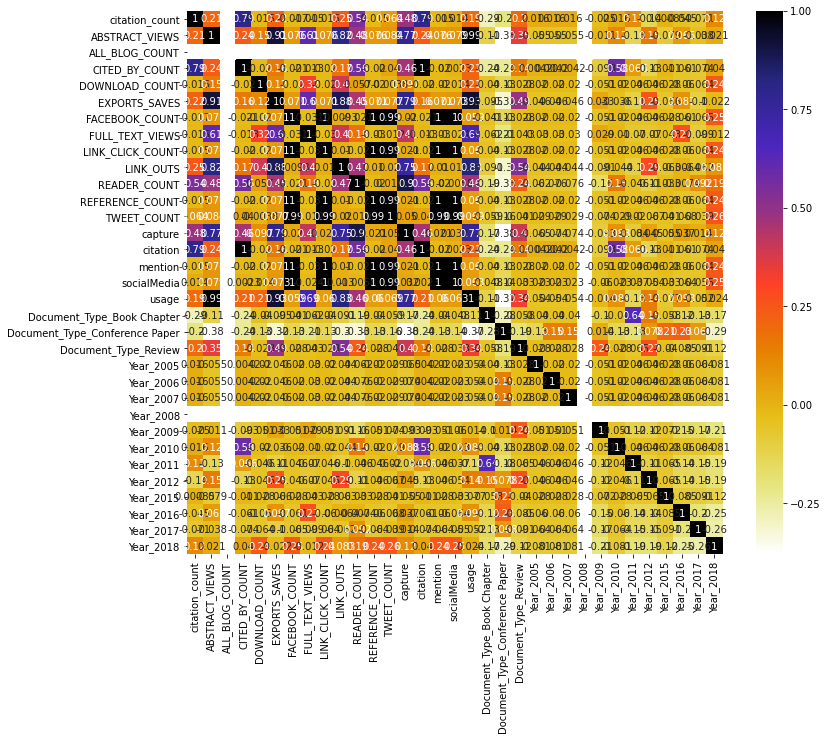

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

11

In [19]:
corr_features

{'CITED_BY_COUNT',
 'EXPORTS_SAVES',
 'LINK_CLICK_COUNT',
 'LINK_OUTS',
 'REFERENCE_COUNT',
 'TWEET_COUNT',
 'capture',
 'citation',
 'mention',
 'socialMedia',
 'usage'}

In [20]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,citation_count,ABSTRACT_VIEWS,ALL_BLOG_COUNT,DOWNLOAD_COUNT,FACEBOOK_COUNT,FULL_TEXT_VIEWS,READER_COUNT,Document_Type_Book Chapter,Document_Type_Conference Paper,Document_Type_Review,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2015,Year_2016,Year_2017,Year_2018
52,4,2.0,0.0,0.0,0.0,0.0,11.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57,4,11.0,0.0,0.0,0.0,0.0,48.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22,5,0.0,0.0,0.0,0.0,0.0,24.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
74,0,1.0,0.0,0.0,0.0,0.0,4.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28,5,0.0,0.0,0.0,0.0,0.0,15.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
26,5,0.0,0.0,0.0,0.0,0.0,44.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
66,4,0.0,0.0,0.0,0.0,0.0,14.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
54,4,0.0,0.0,0.0,0.0,0.0,11.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,4,0.0,0.0,0.0,0.0,0.0,14.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,1,5.0,0.0,0.0,0.0,0.0,13.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
